In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import pandas as pd
import numpy as np

In [7]:
raw_df = pd.read_csv("./MultiLabel.csv")

In [8]:
" Sadness" in raw_df["labels"]

False

In [9]:
sad_song_series = raw_df[raw_df["labels"].str.contains("Sadness")]["lyrics"]

In [10]:
len(sad_song_series)

574

In [11]:
sad_song_corpus = ""
for song in sad_song_series[:30]:
    sad_song_corpus += song

In [12]:
len(sad_song_corpus)

47111

In [13]:
text = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''

In [14]:
import re
import nltk  # just for tokenization
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from tqdm import tqdm

def tokenize(lyric: str) -> list[str]:
    # lowercase the text, remove stop words, punctuation and keep only the words
    tokens = nltk.tokenize.word_tokenize(lyric.lower())
    stop_words = list(string.punctuation)
    lemmatizer = WordNetLemmatizer()
    alpha_tokens = [
        lemmatizer.lemmatize(token)
        for token in tqdm(tokens)
        if token.isalpha() and token not in stop_words
    ]

    return alpha_tokens

In [15]:
tokens = tokenize(sad_song_corpus)

100%|██████████| 10526/10526 [00:01<00:00, 5457.95it/s]


In [16]:
tokens

['i',
 'will',
 'never',
 'bother',
 'you',
 'i',
 'will',
 'never',
 'promise',
 'to',
 'i',
 'will',
 'never',
 'follow',
 'you',
 'i',
 'will',
 'never',
 'bother',
 'you',
 'never',
 'speak',
 'a',
 'word',
 'again',
 'i',
 'will',
 'crawl',
 'away',
 'for',
 'good',
 'i',
 'will',
 'move',
 'away',
 'from',
 'here',
 'you',
 'wo',
 'be',
 'afraid',
 'of',
 'fear',
 'no',
 'thought',
 'wa',
 'put',
 'into',
 'this',
 'and',
 'always',
 'knew',
 'it',
 'would',
 'come',
 'to',
 'this',
 'thing',
 'have',
 'never',
 'been',
 'so',
 'swell',
 'i',
 'have',
 'never',
 'failed',
 'to',
 'fail',
 'you',
 'know',
 'you',
 'right',
 'you',
 'know',
 'you',
 'right',
 'you',
 'know',
 'you',
 'right',
 'i',
 'so',
 'warm',
 'and',
 'calm',
 'inside',
 'i',
 'no',
 'longer',
 'have',
 'to',
 'hide',
 'let',
 'talk',
 'about',
 'someone',
 'else',
 'steaming',
 'soup',
 'against',
 'her',
 'mouth',
 'nothing',
 'really',
 'bother',
 'her',
 'she',
 'just',
 'want',
 'to',
 'love',
 'himself',

In [17]:
len(tokens)

8969

In [18]:
def mapping(tokens):
    word_to_id = {}
    id_to_word = {}
    
    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token
    
    return word_to_id, id_to_word

In [19]:
word_to_id, id_to_word = mapping(tokens)
word_to_id

{'concise': 0,
 'eternity': 1,
 'actuality': 2,
 'mornin': 3,
 'lightning': 4,
 'tossed': 5,
 'got': 6,
 'wo': 7,
 'bar': 8,
 'pudding': 9,
 'fate': 10,
 'westthe': 11,
 'shiver': 12,
 'road': 13,
 'pastor': 14,
 'doin': 15,
 'cake': 16,
 'pine': 17,
 'down': 18,
 'god': 19,
 'cried': 20,
 'personal': 21,
 'distorted': 22,
 'driver': 23,
 'held': 24,
 'world': 25,
 'bother': 26,
 'home': 27,
 'appearance': 28,
 'singing': 29,
 'softly': 30,
 'worst': 31,
 'screaming': 32,
 'hundred': 33,
 'eye': 34,
 'fall': 35,
 'single': 36,
 'nigga': 37,
 'am': 38,
 'praise': 39,
 'needed': 40,
 'maddening': 41,
 'distracted': 42,
 'harvest': 43,
 'to': 44,
 'after': 45,
 'bottle': 46,
 'rapture': 47,
 'wreck': 48,
 'knife': 49,
 'note': 50,
 'favorite': 51,
 'would': 52,
 'running': 53,
 'keep': 54,
 'behind': 55,
 'screechin': 56,
 'yeats': 57,
 'position': 58,
 'womb': 59,
 'help': 60,
 'body': 61,
 'savior': 62,
 'taint': 63,
 'hair': 64,
 'ear': 65,
 'around': 66,
 'else': 67,
 'treacherous': 6

In [20]:
import numpy as np
from tqdm import tqdm

np.random.seed(42)


def generate_training_data(tokens, word_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)
    
    for i in tqdm(range(n_tokens)):
        idx = concat(
            range(max(0, i - window), i), 
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))
    
    return np.asarray(X), np.asarray(y)

In [21]:
def concat(*iterables):
    for iterable in iterables:
        yield from iterable

In [22]:
def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

In [23]:
X, y = generate_training_data(tokens, word_to_id, 3)

100%|██████████| 8969/8969 [00:03<00:00, 2859.94it/s]


In [24]:
X.shape, y.shape

((53802, 1272), (53802, 1272))

In [25]:
def init_network(vocab_size, n_embedding):
    limit1 = np.sqrt(2 / float(vocab_size + n_embedding))
    model = {
        "w1": np.random.normal(
                0.0, limit1, size=(vocab_size, n_embedding)
            ),
        "w2":np.random.normal(
                0.0, limit1, size=(n_embedding, vocab_size)
            )
    }
    # model = {
    #     "w1":np.random.randn(vocab_size, n_embedding),
    #     "w2": np.random.randn(n_embedding, vocab_size)
    # }
    return model

In [26]:
model = init_network(len(word_to_id), 10)

In [1]:
def softmax(x):
    exponents = np.exp(x - x.max(axis=1, keepdims=True))
    return exponents / np.sum(exponents, axis=1, keepdims=True)

In [27]:
def relu_forward(input_activations):
        cached_output = np.maximum(0, input_activations)
        return cached_output

def relu_backward(global_gradients, cached_output):
        local_grad = np.array(global_gradients, copy=True)
        local_grad[cached_output <= 0] = 0
        return local_grad

In [70]:
def forward(model, X, return_cache=True):
    cache = {}
    
    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])
    
    if not return_cache:
        return cache["z"]
    return cache

In [29]:
(X @ model["w1"]).shape

(53802, 10)

In [30]:
(X @ model["w1"] @ model["w2"]).shape

(53802, 1272)

1

In [75]:
def backward(model, X, y, alpha):
    cache  = forward(model, X)
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    loss = cross_entropy(cache["z"], y)
    print(loss)
    return loss

In [76]:
# def cross_entropy(softmax_y, y_true):
#         print(softmax_y.shape, y_true.shape)
#         # y_true is a single dimension class label
#         samples = len(y_true)
#         softmax_y = np.clip(softmax_y, 1e-20, 1 - 1e-20)
#         predicted_prob = softmax_y[y_true]

#         # for the rest of the classes y_true would be 0 so, no need to consider them
#         loss = -np.mean(np.log(predicted_prob))

#         return loss


In [77]:
def cross_entropy(z, y):
    return - np.mean(np.log(np.clip(z, 1e-20, 1 - 1e-20)) * y)

In [78]:
X.shape, y.shape

((53802, 1272), (53802, 1272))

C:\Users\shivs\AppData\Local\Temp\ipykernel_6616\3806002014.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:03<00:14,  3.58s/it]

0.009851892483281308


 40%|████      | 2/5 [00:10<00:16,  5.35s/it]

0.036119668687163126


 60%|██████    | 3/5 [00:17<00:12,  6.30s/it]

0.036157736999866685


 80%|████████  | 4/5 [00:25<00:06,  6.76s/it]

0.03618532651128412


100%|██████████| 5/5 [00:32<00:00,  6.51s/it]

0.036188018170934616


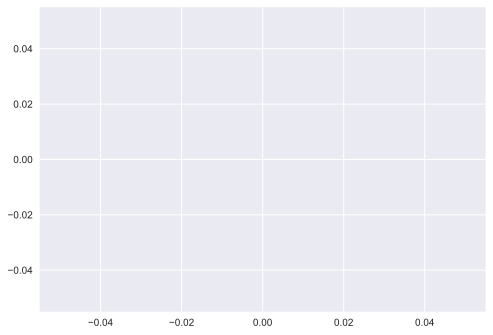

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

model = init_network(len(word_to_id), 10)
n_iter = 5
learning_rate = 0.1
history = []
for iter_i in tqdm(range(n_iter)):
    history.append(backward(model, X, y, learning_rate))


plt.plot(range(len(history)), history, color="skyblue")
plt.show()

In [62]:
one_hot_encode(word_to_id["even"], len(word_to_id)) == one_hot_encode(word_to_id["i"], len(word_to_id))

False

In [63]:
result[:10]

NameError: name 'result' is not defined

In [64]:
relu_forward(model["w2"])

array([[ 0.        ,  0.        ,  0.58520734, ...,  0.66843948,
         1.26716861, 43.43769611],
       [ 0.50876224,  0.        ,  0.        , ...,  0.28685027,
         0.        , 50.12938398],
       [ 0.        ,  0.76203858,  0.        , ...,  0.        ,
         1.61244902, 81.34063899],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.01121112,
         6.31595827, 90.95861398],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.44626038, 35.67176437],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         2.10781078, 39.17868002]])

In [92]:
learning = one_hot_encode(word_to_id["inside"], len(word_to_id))
result = forward(model, [learning], return_cache=False)[0]

predictions = [id_to_word[id] for id in np.argsort(result)[::-1]]
print(predictions)

['room', 'that', 'paperweight', 'followed', 'word', 'least', 'don', 'flower', 'betraying', 'deal', 'hormone', 'west', 'victim', 'infatuated', 'soulthis', 'try', 'away', 'green', 'spilled', 'camera', 'fail', 'youa', 'poem', 'ran', 'find', 'run', 'stand', 'intention', 'youwell', 'luck', 'this', 'fear', 'tell', 'melt', 'treat', 'sighti', 'tread', 'sit', 'dead', 'her', 'cover', 'pain', 'river', 'bone', 'ad', 'yeahmy', 'blacki', 'girl', 'violent', 'failed', 'ain', 'drown', 'older', 'clock', 'him', 'beard', 'though', 'mirror', 'bugging', 'clever', 'fake', 'seems', 'retirin', 'streak', 'wall', 'waste', 'so', 'raised', 'tattered', 'somethin', 'ripped', 'discussion', 'cuba', 'lyin', 'row', 'yours', 'humble', 'nose', 'wan', 'acting', 'up', 'night', 'ours', 'even', 'how', 'lonely', 'speak', 'spot', 'arm', 'molasses', 'primitive', 'mention', 'tied', 'scared', 'attention', 'tab', 'ragdoll', 'assured', 'name', 'hurricane', 'lost', 'each', 'than', 'town', 'stay', 'shaped', 'shit', 'm', 'dis', 'swap',

In [66]:
def get_embedding(model, word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print("`word` not in corpus")
    one_hot = one_hot_encode(idx, len(word_to_id))
    return forward(model, one_hot)["a1"]

In [67]:
get_embedding(model, "i")

AxisError: axis 1 is out of bounds for array of dimension 1